# Recursion



## Imports

In [1]:
import pprint
import numpy as np

from mercs import Mercs

#from modulo.core import Modulo
#from modulo.graph import model_to_graph
#from modulo.visuals import show_diagram

from mercs.tests.setup import RANDOM_STATE, default_dataset

pp = pprint.PrettyPrinter(indent=4)

msg = """
Random seed for this experiment is:   {}

This is my typical random seed for all my experiments.
""".format(RANDOM_STATE)

print(msg)


Random seed for this experiment is:   42

This is my typical random seed for all my experiments.



# Setup

Create an interesting enough composite model

In [37]:
train, test = default_dataset()
q_code = np.array([0, 0, -1, -1, -1, -1, 0, 1])

m_basic = Mercs(
    random_state=RANDOM_STATE,
    prediction_algorithm="mi",
    selection_algorithm="random",
    nb_iterations=3,
    fraction_missing=0.5,
    max_depth=2,
    regression_max_depth=2,
)

m_basic.fit(train, nominal_attributes={7})
#m_basic.m_codes

In [38]:
len(m_basic.m_codes)

24

In [39]:
y_pred_01 = m_basic.predict(test, q_code=q_code)

So, this model has now done a prediction for the provided query. But we can easily examine what it did, by showing the diagram of the composition.

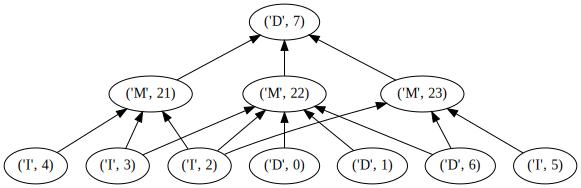

In [40]:
m_basic.show_q_diagram()

The composition is again an ML model, which we can extract as `q_compose` (n.b., the `q` refers to `query`). And we can examine its attributes. These attributes are obviously derived from the original query.

In [41]:
q_compose = m_basic.q_diagram
q_compose.desc_ids, q_compose.targ_ids

({0, 1, 6}, {7})

From this diagram, which encodes the computation (and most importantly, the _data flow_), we derive an implicit _query model_ which from the outside, behaves exactly as a regular ML-model. Mathematically, it behaves as a function, essentially.

In [42]:
q_model = m_basic.q_model

In [43]:
q_model.classes_, q_model.feature_importances_

([array([0., 1.])],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [44]:
y_pred = q_model.predict(test[:, list(q_model.desc_ids)])
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [45]:
y_proba = q_model.predict_proba(test[:, list(q_model.desc_ids)])
y_proba[0][:10]

array([[1.73766071, 1.26233929],
       [1.92093814, 1.07906186],
       [1.92093814, 1.07906186],
       [1.73766071, 1.26233929],
       [1.92093814, 1.07906186],
       [1.92093814, 1.07906186],
       [1.92093814, 1.07906186],
       [1.32776292, 1.67223708],
       [1.92093814, 1.07906186],
       [1.92093814, 1.07906186]])

# MRAI

In [46]:
q_code = np.array([0, 0, -1, -1, -1, -1, 0, 1])

m_mrai = Mercs(
    random_state=RANDOM_STATE,
    prediction_algorithm="mrai",
    clf_criterion="entropy",
    rgr_criterion="mae",
    selection_algorithm="random",
    nb_iterations=1,
    fraction_missing=0.5,
    max_depth=15,
    regression_max_depth=25,
)

m_mrai.fit(train, nominal_attributes={7})

Now, we'll epxlicitly add our previous composition to this new mercs model. **Note that this new mercs model is 100% oblivious** about the true nature of this new component, it just treats it as if it was any other model/graph that it possseses.

In [47]:
m_mrai._add_model(q_model)

In [48]:
y_pred_02 = m_mrai.predict(test, q_code=q_code)

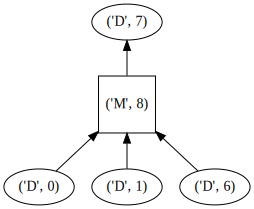

In [49]:
m_mrai.show_q_diagram()

# IT

Let us verify that `M-8` is really 100% a model on par with the other building blocks and see if it can get picked as a component when making fresh compositions.

In [50]:
q_code = np.array([0, 0, -1, -1, -1, -1, 0, 1])

q_code = np.array([0, 1, 0, 0, 0, 0, 0, 0])

q_code = np.array([1,0,0,-1,-1,-1,0,1])

m_it = Mercs(random_state=RANDOM_STATE,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

m_it.fit(train, nominal_attributes={7})

m_it._add_model(q_model)

In [51]:
msg = """
The ID of the composite model is: {}
""".format(len(m_it.m_list)-1)
print(msg)


The ID of the composite model is: 24



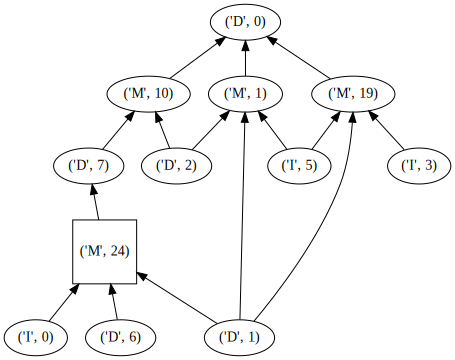

In [52]:
y_pred_03 = m_it.predict(test, q_code=q_code)

m_it.show_q_diagram()

In [18]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
